# **CHANGE IN MEAN SEA LEVELS**

Sea level rise is one of the main indicators of climate change and it has been rising at about 3.3 millimeters per year since the early 1990s (the beginning of our satellite record, as seen below in the Copernicus Marine Ocean Monitoring Indicator catalogue). New calculations in the fourth Ocean State Report reveal that sea level rise is accelerating with this rate increasing by 0.12+-0.073mm/year each year.
 
The dataset "Change in Mean Sea Levels" provides information on the variation in mean sea levels over time. The data covers different regions, and the observations are associated with various indicators, units, and sources. 

Data source:  
International Monetary Fund (IMF). 2020.
Sea Level Rise. Laboratory for Satellite
Altimetry. [Link]
(https://climatedata.imf.org/).

## 1. Research Questions


1. What are the predicted mean sea levels for specific regions or globally at future time points, specifically looking 25 years ahead?


2. How can we identify unusual or extreme sea level values that may serve as indicators of anomalies or events, such as storms or floods?


3. What are the patterns and characteristics of annual cycles in sea level changes, and how do they vary over time?


## 2. Data Selection

### Dataset: Change in Mean Sea Levels

**Dataset Overview:**

The dataset "Change in Mean Sea Levels" provides information on the variation in mean sea levels over time. The data covers different regions, and the observations are associated with various indicators, units, and sources.


**Data Source:**
- International Monetary Fund (IMF). 2020. Sea Level Rise. Laboratory for Satellite Altimetry. [Link](https://climatedata.imf.org/). 

## 3. Import Libraries

In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest


## 4. Load the dataset

In [2]:
file_path = "/kaggle/input/change-in-mean-sea-levels/Change_in_Mean_Sea_Levels.csv"
df = pd.read_csv(file_path)

df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,D12/17/1992,-10.34
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,D12/17/1992,-18.46
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,D12/17/1992,-15.41
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,D12/17/1992,196.85
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,D12/17/1992,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35599,35600,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",South China,D11/08/2022,3.76
35600,35601,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Southern Ocean,D11/08/2022,3.22
35601,35602,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Tropics,D11/08/2022,3.11
35602,35603,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",World,D11/08/2022,3.07


## 5. Data Understanding

Get to know the dataset before we preprocess it. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             35604 non-null  int64  
 1   Country              35604 non-null  object 
 2   ISO2                 0 non-null      float64
 3   ISO3                 35604 non-null  object 
 4   Indicator            35604 non-null  object 
 5   Unit                 35604 non-null  object 
 6   Source               35604 non-null  object 
 7   CTS_Code             35604 non-null  object 
 8   CTS_Name             35604 non-null  object 
 9   CTS_Full_Descriptor  35604 non-null  object 
 10  Measure              35604 non-null  object 
 11  Date                 35604 non-null  object 
 12  Value                35604 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.5+ MB


In [4]:
# Display unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for ObjectId:
[    1     2     3 ... 35602 35603 35604]

Unique values for Country:
['World']

Unique values for ISO2:
[nan]

Unique values for ISO3:
['WLD']

Unique values for Indicator:
['Change in mean sea level: Sea level: TOPEX.Poseidon'
 'Change in mean sea level: Sea level: Jason.1'
 'Change in mean sea level: Sea level: Jason.2'
 'Change in mean sea level: Sea level: Jason.3'
 'Change in mean sea level: Sea level: Trend']

Unique values for Unit:
['Millimeters']

Unique values for Source:
['National Oceanic and Atmospheric Administration (NOAA). 2020. Sea Level Rise. Laboratory for Satellite Altimetry. https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/LSA_SLR_timeseries.php. Accessed on 2022-12-08.']

Unique values for CTS_Code:
['ECCL']

Unique values for CTS_Name:
['Change in Mean Sea Level']

Unique values for CTS_Full_Descriptor:
['Environment, Climate Change, Climate Indicators, Change in Mean Sea Level']

Unique values for Measure:
['Andaman Sea' 'Arabi

## 6. Data Cleaning, Preparation, and Wrangling

#### 6.1 Check for missing values

In [5]:
# Check for missing values
df.isnull().sum()

ObjectId                   0
Country                    0
ISO2                   35604
ISO3                       0
Indicator                  0
Unit                       0
Source                     0
CTS_Code                   0
CTS_Name                   0
CTS_Full_Descriptor        0
Measure                    0
Date                       0
Value                      0
dtype: int64

Since the values in all rows of column 'ISO2' is null, so we have to drop the columns.

#### 6.2 Handle missing values and drop unnecessary columns

In [6]:
# Drop 'ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator','Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'
df.drop(columns=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator','Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], inplace=True)

Drop all the columns that has no meaning and provide no information. 

#### 6.3 Checking for duplicates

In [7]:
df.duplicated().sum()

0

No duplicate column found, so there is no need to drop any rows.

#### 6.4 Stardardize the 'date' formats

In [8]:
# Convert the dates values to a consistent format
df['Date'] = pd.to_datetime(df['Date'], format='D%m/%d/%Y')
df

,Unit,Measure,Date,Value
0,Millimeters,Andaman Sea,1992-12-17,-10.34
1,Millimeters,Arabian Sea,1992-12-17,-18.46
2,Millimeters,Atlantic Ocean,1992-12-17,-15.41
3,Millimeters,Baltic Sea,1992-12-17,196.85
4,Millimeters,Bay Bengal,1992-12-17,3.27
...,...,...,...,...
35599,Millimeters,South China,2022-11-08,3.76
35600,Millimeters,Southern Ocean,2022-11-08,3.22
35601,Millimeters,Tropics,2022-11-08,3.11
35602,Millimeters,World,2022-11-08,3.07


The values in the 'Date' column has been standardized by using format 'year-month-day'.

#### 6.5 Separate the values in 'Date' column
Create new columns for year, month, and date 

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Unit,Measure,Date,Value,Year,Month,Day
0,Millimeters,Andaman Sea,1992-12-17,-10.34,1992,12,17
1,Millimeters,Arabian Sea,1992-12-17,-18.46,1992,12,17
2,Millimeters,Atlantic Ocean,1992-12-17,-15.41,1992,12,17
3,Millimeters,Baltic Sea,1992-12-17,196.85,1992,12,17
4,Millimeters,Bay Bengal,1992-12-17,3.27,1992,12,17


#### 6.6 Lowercase the value in 'Unit' column.

In [10]:
df['Unit'] = df['Unit'].str.lower()
df.head()

,Unit,Measure,Date,Value,Year,Month,Day
0,millimeters,Andaman Sea,1992-12-17,-10.34,1992,12,17
1,millimeters,Arabian Sea,1992-12-17,-18.46,1992,12,17
2,millimeters,Atlantic Ocean,1992-12-17,-15.41,1992,12,17
3,millimeters,Baltic Sea,1992-12-17,196.85,1992,12,17
4,millimeters,Bay Bengal,1992-12-17,3.27,1992,12,17


### 6.7 Rename columns

#### 6.7.1 Renaming column 'Measure' to 'Region'

In [11]:
df.rename(columns={'Measure': 'Region'}, inplace=True)
df.head()

,Unit,Region,Date,Value,Year,Month,Day
0,millimeters,Andaman Sea,1992-12-17,-10.34,1992,12,17
1,millimeters,Arabian Sea,1992-12-17,-18.46,1992,12,17
2,millimeters,Atlantic Ocean,1992-12-17,-15.41,1992,12,17
3,millimeters,Baltic Sea,1992-12-17,196.85,1992,12,17
4,millimeters,Bay Bengal,1992-12-17,3.27,1992,12,17


The 'Measure' column has been renamed as 'Region'.

### 6.8 Sort data
#### 6.8.1 Sort by Value: To explore the highest and lowest value of the 'Mean Sea Level'

In [12]:
df.sort_values(by="Value", inplace=True)
df

,Unit,Region,Date,Value,Year,Month,Day
19840,millimeters,Baltic Sea,2010-02-21,-401.85,2010,2,21
26358,millimeters,Baltic Sea,2014-02-08,-392.05,2014,2,8
700,millimeters,Baltic Sea,1993-10-09,-381.95,1993,10,9
25345,millimeters,Baltic Sea,2013-03-22,-363.10,2013,3,22
2700,millimeters,Baltic Sea,1996-03-19,-354.55,1996,3,19
...,...,...,...,...,...,...,...
33010,millimeters,Baltic Sea,2020-01-20,472.47,2020,1,20
13052,millimeters,Baltic Sea,2005-01-15,486.20,2005,1,15
125,millimeters,Baltic Sea,1993-02-04,495.15,1993,2,4
15503,millimeters,Baltic Sea,2006-12-20,504.70,2006,12,20


We can see that the **lowest** value of mean sea level was on 21/2/2010 which is **-401.85 mm**. 

While the **highest** mean sea level has achieved was on 13/12/2015 which the value is **504.95 mm**.

Both lowest and highest were achieve by **Baltic Region**. 

#### 6.8.2 Sort by Date

In [13]:
df.sort_values(by=["Date"], inplace=True)
df

,Unit,Region,Date,Value,Year,Month,Day
6,millimeters,Gulf Mexico,1992-12-17,-3.95,1992,12,17
21,millimeters,Yellow Sea,1992-12-17,-70.61,1992,12,17
7,millimeters,Indian Ocean,1992-12-17,-27.63,1992,12,17
10,millimeters,Nino,1992-12-17,-3.13,1992,12,17
12,millimeters,North Sea,1992-12-17,44.01,1992,12,17
...,...,...,...,...,...,...,...
35602,millimeters,World,2022-11-08,3.07,2022,11,8
35587,millimeters,Gulf Mexico,2022-11-08,4.29,2022,11,8
35600,millimeters,Southern Ocean,2022-11-08,3.22,2022,11,8
35581,millimeters,Arabian Sea,2022-11-08,3.59,2022,11,8


### 6.9 Discretization and Binning

From the 'Sort by value', we obtained the min and max value for the 'Value' that represent the mean sea level, and from there we can create the bin according to the appropriate bin size.

In [14]:
# Define bin edges for the "Value" column
bins = [-400, -350, -300, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Binning the "Value" Column
cats = pd.cut(df['Value'],bins)
cats

6           (-50, 0]
21       (-100, -50]
7           (-50, 0]
10          (-50, 0]
12           (0, 50]
            ...     
35602        (0, 50]
35587        (0, 50]
35600        (0, 50]
35581        (0, 50]
35592        (0, 50]
Name: Value, Length: 35604, dtype: category
Categories (18, interval[int64, right]): [(-400, -350] < (-350, -300] < (-300, -250] < (-250, -200] ... (300, 350] < (350, 400] < (400, 450] < (450, 500]]

In [15]:
# Counting the number of values in each of the bin
pd.value_counts(cats)

/tmp/ipykernel_13/134442694.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


Value
(0, 50]         13861
(-50, 0]         8121
(50, 100]        7268
(100, 150]       2396
(-100, -50]      2111
(150, 200]        719
(-150, -100]      513
(200, 250]        209
(-200, -150]      155
(250, 300]         77
(-250, -200]       51
(300, 350]         38
(-300, -250]       24
(350, 400]         23
(-350, -300]       15
(450, 500]          8
(400, 450]          6
(-400, -350]        6
Name: count, dtype: int64

The main purpose of this binning process is to gain insights into the distribution of values in the "Value" column. It also helps in detecting outliers.

## 7. Data Aggregation and Group Operations

#### 7.1 Set_index: Mean of 'Global' sea level

In [16]:
# Indexing with column 'Date' using 'set_index'
global_mean_sea_level = df[df["Region"] == "World"][["Date", "Value"]].set_index("Date")
global_mean_sea_level

,Value
Date,
1992-12-17,-15.95
1992-12-27,-17.65
1993-01-05,-14.55
1993-01-15,-19.55
1993-01-25,-24.95
...,...
2022-10-10,82.98
2022-10-19,82.68
2022-10-30,83.48


The mean sea level for global were count by using the "Date" and "Value" columns. The column "Date" are used as the index to create a time-series to represent the global mean sea level trend. 

#### 7.2 GroupBy: Annual Mean Values

In [17]:
# Group data by year for seasonal/cyclical analysis
annual_means = df.groupby("Year")["Value"].mean()
annual_means

Year
1992     4.265600
1993   -20.684635
1994   -16.753576
1995    -6.903635
1996    -7.159048
1997    -3.745188
1998     0.425479
1999     2.762812
2000     3.911835
2001     4.532603
2002     4.368462
2003    10.552680
2004    11.026544
2005     6.557321
2006     9.242289
2007    17.426356
2008    30.510821
2009    24.612352
2010    30.322154
2011    29.844335
2012    42.438345
2013    35.923380
2014    40.601074
2015    54.125600
2016    59.508530
2017    51.109914
2018    52.734897
2019    58.994843
2020    75.688853
2021    78.271222
2022    80.918392
Name: Value, dtype: float64

#### 7.3 GroupBy: Mean Across Region

In [18]:
# Group data by region for regional analysis
regional_means = df.groupby("Region")["Value"].mean()
regional_means

Region
Adriatic Sea      19.854718
Andaman Sea       31.470049
Arabian Sea       29.451895
Atlantic Ocean    26.065631
Baltic Sea        32.198034
Bay Bengal        31.617029
Bering Sea        10.880274
Caribbean Sea     26.462477
Gulf Mexico       34.548849
Indian Ocean      26.434811
Indonesian        36.088133
Mediterranean     19.420147
Nino              25.692447
North Atlantic    21.459123
North Pacific     24.437923
North Sea         24.618869
Pacific Ocean     23.514271
Persian Gulf      33.066620
Sea Japan         26.291622
Sea Okhotsk       15.088947
South China       30.992414
Southern Ocean    26.759923
Tropics           25.608717
World             25.098927
Yellow Sea        22.494916
Name: Value, dtype: float64

## 8. Data Visualization

### 8.1 Distribution of Mean Sea Level from all Regions

The graph below was using the value 'bins' created in subsection 6.9.

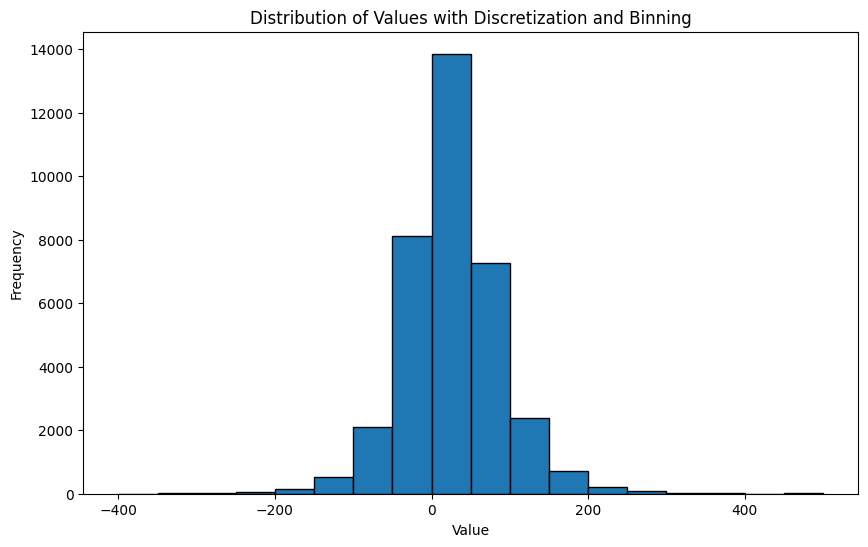

In [19]:
# Visualize the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=bins, edgecolor='black')
plt.title('Distribution of Values with Discretization and Binning')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Insights:
The histogram reveals the shape and spread of the "Value" data. The height of each bar represents the number of data points falling within that bin's range. 

### 8.2 Distribution of Mean Sea Level from 'Baltic Sea' Region

Since it has the highest and lowest value of mean sea level (discovered in subsection 6.8.1), let's explore its distribution of the values. The bins categories obtained in subsection 6.9.

In [20]:
# Filter for Baltic Sea data
df_filtered = df[df['Region'] == "Baltic Sea"]

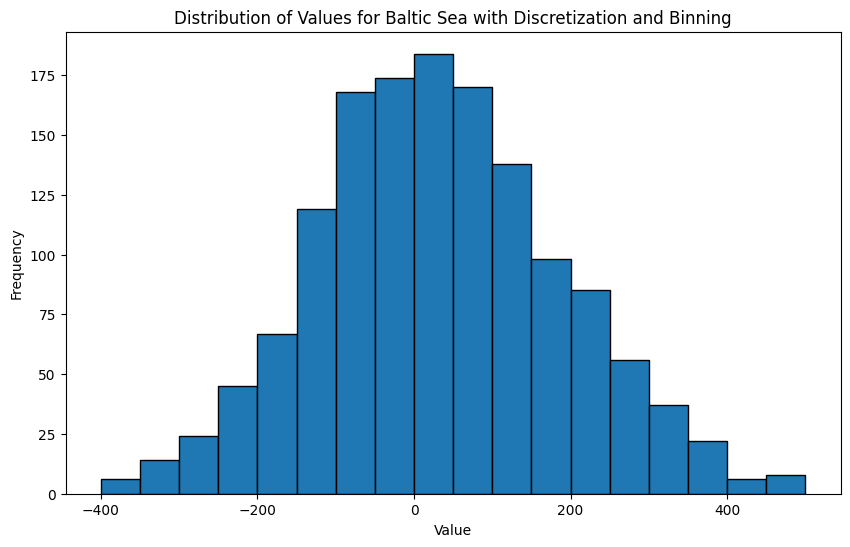

In [21]:
# Visualize the histogram for Baltic Sea
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Value'], bins=bins, edgecolor='black')
plt.title('Distribution of Values for Baltic Sea with Discretization and Binning')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Insights:
The graph shows that the Baltic Sea have a central tendency. This depict that eventhough Baltic Sea had the highest and lowest value of mean sea level, it still had a consistent pattern and had a normal distribution of values.

### 8.3 Global Mean Sea Level Trend (all regions)
By using the global mean (global_mean_sea_level) calculated in subsection 7.1, the graph below shows the trend for all the regions across the year of 1992- 2022.

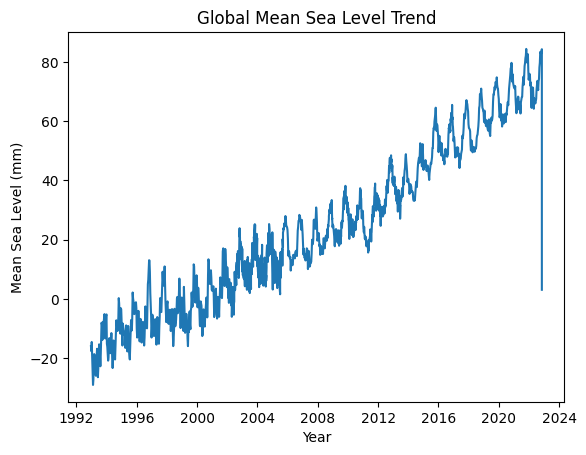

In [22]:
# Visualize global mean sea level trend
plt.plot(global_mean_sea_level.index, global_mean_sea_level["Value"])
plt.xlabel("Year")
plt.ylabel("Mean Sea Level (mm)")
plt.title("Global Mean Sea Level Trend")
plt.show()

#### Insights:
The graph depict a steady increase in mean sea level as year passed. The trend shows that eventhough the mean sea level in the next year are low, it will never lower than the record of the year before.

### 8.4 Mean Sea Level Change Annualy

The value of mean sea level for annuarly (annual_means) was obtained after it was calculated in subsection 7.2. It is to see the change (seasonal/cyclical analysis) of the mean sea level accross years. 

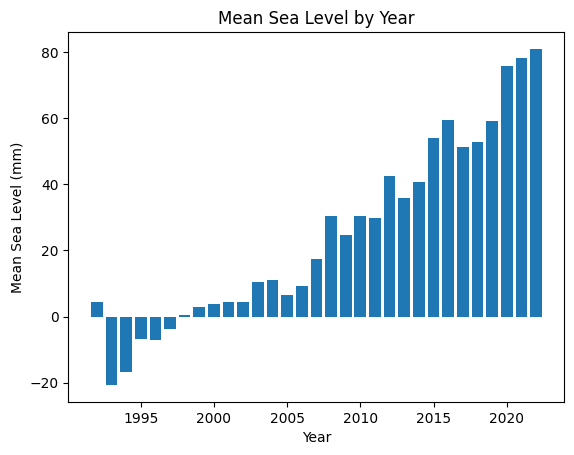

In [23]:
# Seasonal/cyclical variations
plt.bar(annual_means.index, annual_means.values)
plt.xlabel('Year')
plt.ylabel('Mean Sea Level (mm)')
plt.title('Mean Sea Level by Year')
plt.show()

#### Insights:
the graph clearly shows that there is increasing of mean sea level for each year. This indicating that the surface ocean are increasing by years and most likely causes by the global warming and lead to the melting of the glacier.

### 8.5 Mean Sea Level Across Region
Mean accross region (regional_means) was calculated in subsection 7.3. 

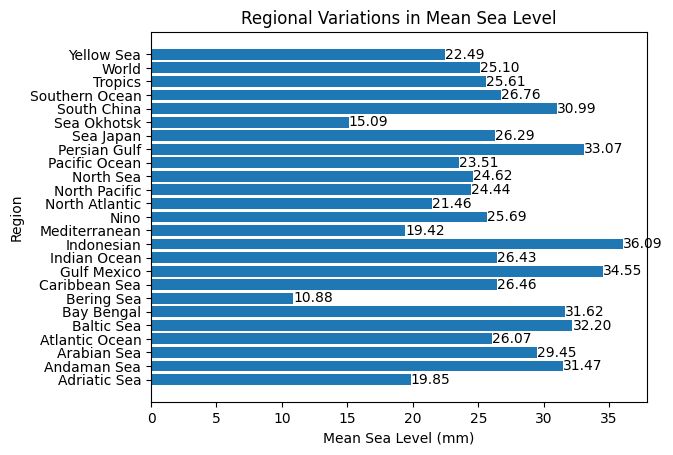

In [24]:
# Visualizing the regional variations
plt.barh(regional_means.index, regional_means.values)

# Adding value labels to each bar
for index, value in enumerate(regional_means.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

plt.xlabel("Mean Sea Level (mm)")
plt.ylabel("Region")
plt.title("Regional Variations in Mean Sea Level")
plt.show()

#### Insights:

We can see from the plotted graph, that **Bering Sea** has the lowest mean sea level which is **10.88 mm**. While the highest mean sea level with the value of **36.09** mm was held by **Indonesian** region. 

## 9. Machine Learning Implementation

### 9.1 To answer Research Question 1
#### Future Mean Sea Level Forecasting
Predict mean sea levels for specific regions or globally at future time points (5 years ahead).

In [25]:
# Selecting the 'Year' and 'Value' data for prediction
X = df[["Year"]]  # "Year" is the relevant predictor
y = df["Value"]  # Our target variable

In [26]:
# Creating the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [27]:
# Selecting the 'Year' and 'Value' data for prediction
X = df[["Year"]]  # "Year" is the relevant predictor
y = df["Value"]  # Our target variable

# Creating the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting mean sea levels for the next 20 years (2025-2050)
future_years = range(2025, 2051)  # Updated range for 2025 to 2050

# Initializing 'future_X' for future predictions
future_X = pd.DataFrame({"Year": future_years})

# Using the model developed to predict mean sea levels for the next 25 years
future_predictions = model.predict(future_X)

print("Predicted mean sea levels for the next 25 years:")

# Display the predicted mean sea levels for each future year
for year, prediction in zip(future_years, future_predictions):
    print(f"{year}: {prediction:.2f} mm")


Predicted mean sea levels for the next 25 years:
2025: 80.98 mm
2026: 84.19 mm
2027: 87.41 mm
2028: 90.63 mm
2029: 93.85 mm
2030: 97.07 mm
2031: 100.29 mm
2032: 103.51 mm
2033: 106.72 mm
2034: 109.94 mm
2035: 113.16 mm
2036: 116.38 mm
2037: 119.60 mm
2038: 122.82 mm
2039: 126.04 mm
2040: 129.25 mm
2041: 132.47 mm
2042: 135.69 mm
2043: 138.91 mm
2044: 142.13 mm
2045: 145.35 mm
2046: 148.57 mm
2047: 151.78 mm
2048: 155.00 mm
2049: 158.22 mm
2050: 161.44 mm


#### Insights:
Using linear regression to predict the mean of sea level in the next 25 years, we can see that there is **increase** in the mean sea level. An **increase** in mean sea level also depict that there is **increase** in sea temparature. Thus, this not only endanger marine life that live in the upper part of the ocean but to human as well as the hurricane and typhoon intensity are **increasing** as the ocean get warmer.

### 9.2 To answer Research Question 2
#### Anomaly Detection
Identify unusual or extreme sea level values that might signal anomalies or events like storms or floods.

In [28]:
df['MonthOfYear'] = df['Date'].dt.month

features = ['Year', 'Month', 'MonthOfYear', 'Value']
features

['Year', 'Month', 'MonthOfYear', 'Value']

In [29]:
data_for_anomaly_detection = df[features].copy()

model = IsolationForest(contamination=0.05)
model.fit(data_for_anomaly_detection)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [30]:
df['IsAnomaly'] = model.predict(data_for_anomaly_detection)
print("Detected anomalies:\n", df[df['IsAnomaly'] == -1])

Detected anomalies:
               Unit        Region       Date   Value  Year  Month  Day  \
6      millimeters   Gulf Mexico 1992-12-17   -3.95  1992     12   17   
21     millimeters    Yellow Sea 1992-12-17  -70.61  1992     12   17   
7      millimeters  Indian Ocean 1992-12-17  -27.63  1992     12   17   
10     millimeters          Nino 1992-12-17   -3.13  1992     12   17   
12     millimeters     North Sea 1992-12-17   44.01  1992     12   17   
...            ...           ...        ...     ...   ...    ...  ...   
35564  millimeters    Indonesian 2022-11-08  196.38  2022     11    8   
35574  millimeters   South China 2022-11-08  197.90  2022     11    8   
35562  millimeters   Gulf Mexico 2022-11-08  184.66  2022     11    8   
35569  millimeters     North Sea 2022-11-08  213.20  2022     11    8   
35571  millimeters  Persian Gulf 2022-11-08  157.17  2022     11    8   

       MonthOfYear  IsAnomaly  
6               12         -1  
21              12         -1  
7     

In [31]:
#Predict anomalies
predictions = model.predict(data_for_anomaly_detection)
df['IsAnomaly'] = (predictions == -1)
print("Detected anomalies:\n", df['IsAnomaly'])

Detected anomalies:
 6         True
21        True
7         True
10        True
12        True
         ...  
35602    False
35587    False
35600    False
35581    False
35592    False
Name: IsAnomaly, Length: 35604, dtype: bool


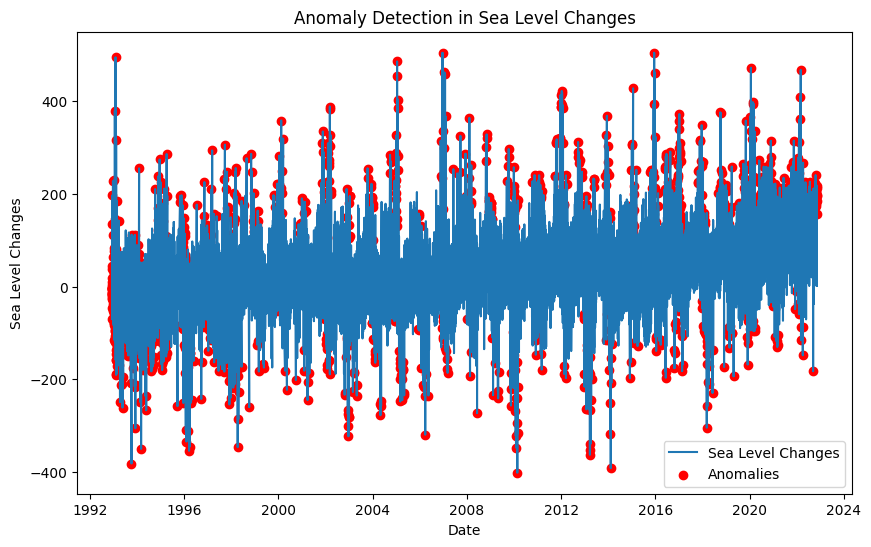

In [32]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Sea Level Changes')
plt.scatter(df[df['IsAnomaly']]['Date'], df[df['IsAnomaly']]['Value'], color='red', label='Anomalies')  # Fix: Removed extra comma
plt.xlabel('Date')
plt.ylabel('Sea Level Changes')
plt.title('Anomaly Detection in Sea Level Changes')
plt.legend()
plt.show()  # Fix: Corrected 'ply.show()' to 'plt.show()'


#### Insights:
Based on the output above, we can see that there is always anomaly happened each year. This anomaly can be caused by the global warming. Thus, whenever El NiNo and La Nina happened each year, the mean se level are heavily affected because of the thermal expansion.

### 9.3 To answer Research Question 3
#### Seasonal/Cyclical Pattern Analysis
Explore annual cycles in sea level changes.

By using the value mean of the "Value" column for each year calculated before, graph below shows the annual means of the sea level from the 1992 until 2022. 

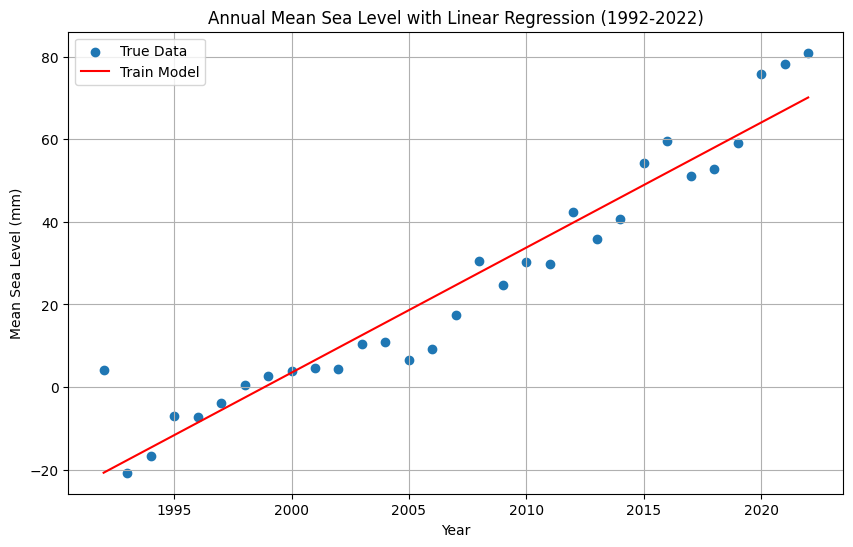

In [33]:
# Calculate annual means of sea level
annual_means = df.groupby('Year')['Value'].mean().reset_index()

# Reshape the data for linear regression
X = annual_means['Year'].values.reshape(-1, 1)
y = annual_means['Value'].values

# Create and train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict sea levels using the linear regression model
predicted_values = model.predict(X)

# Visualize the annual means and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='True Data')
plt.plot(X, predicted_values, color='red', label='Train Model')
plt.xlabel("Year")
plt.ylabel("Mean Sea Level (mm)")
plt.title("Annual Mean Sea Level with Linear Regression (1992-2022)")
plt.legend()
plt.grid(True)
plt.show()


#### Insights:
The annual cycle of the mean sea level is **increasing** as time passed. Although there are slight decrease in certain year, the decrease would not lower than the year before.